# Exploratory Data Analysis and Clustering

With our data pulled from the AniList API and cleaned, we will now perform EDA and cluster analysis on it.

In [1]:
import pandas as pd
import numpy as np

In [ ]:
# from google.colab import drive 
# drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Read-in and cleaning

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Anime project/anime-1991-2021_v3.csv',lineterminator='\n')
df = df.set_index('id',drop=True)

In [3]:
def convert_to_list(x):
  s = x.replace("[","").replace("]","").replace("'","")
  return s.split(", ")

df['genres'] = df['genres'].apply(convert_to_list)
df['tags_cleaned'] = df['tags_cleaned'].apply(convert_to_list)
df['staff'] = df['staff'].apply(convert_to_list)

In [4]:
df.head()

,popularity,averageScore,genres,episodes,format,description,season,seasonYear,favourites,source,duration,siteUrl,title,studio,tags_cleaned,staff
id,,,,,,,,,,,,,,,,
1029,25525,72.0,"[Drama, Romance, Slice of Life]",1.0,MOVIE,"Taeko Okajima is a typical ""office lady"" in a ...",SUMMER,1991.0,697,MANGA,118.0,https://anilist.co/anime/1029,Only Yesterday,Studio Ghibli,"[Female Protagonist, Iyashikei, Rural, Philoso...","[Hotaru Okamoto, Yuko Tone, Isao Takahata, Nor..."
898,21115,66.0,"[Action, Adventure, Comedy, Fantasy, Sci-Fi]",1.0,MOVIE,"After defeating Freeza, Goku returns to Earth ...",SUMMER,1991.0,149,MANGA,48.0,https://anilist.co/anime/898,Dragon Ball Z: Cooler's Revenge,Toei Animation,"[Martial Arts, Shounen, Super Power, Aliens]","[Akira Toriyama, Mitsuo Hashimoto, Yasuyuki Fu..."
897,17622,60.0,"[Action, Adventure, Comedy, Fantasy, Sci-Fi]",1.0,MOVIE,A Super Namekian named Slug comes to invade Ea...,SPRING,1991.0,87,MANGA,52.0,https://anilist.co/anime/897,Dragon Ball Z: Lord Slug,Toei Animation,"[Shounen, Super Power]","[Akira Toriyama, Mitsuo Hashimoto, Minoru Maed..."
795,11194,77.0,"[Drama, Psychological]",39.0,TV,"Before leaving her cram school, Nanako Misonō ...",SUMMER,1991.0,498,MANGA,25.0,https://anilist.co/anime/795,Dear Brother,Tezuka Productions,"[Tragedy, School, Ojou-sama, Primarily Female ...","[Riyoko Ikeda, Osamu Dezaki, Tomoko Konparu, H..."
2000,8185,68.0,"[Action, Comedy, Drama, Mecha, Sci-Fi]",1.0,MOVIE,The Z Project was intended to give the new gen...,SUMMER,1991.0,86,ORIGINAL,79.0,https://anilist.co/anime/2000,Roujin Z,APPP,"[Artificial Intelligence, Primarily Adult Cast...","[Katsuhiro Ootomo, Hisashi Eguchi, Hiroyuki Ki..."


## EDA

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc = {'figure.figsize':(10,8)})

**How many of each source material from which the anime was created are there in the dataset?**

In [ ]:
df['source'].value_counts()

MANGA           1498
ORIGINAL         672
LIGHT_NOVEL      443
OTHER            203
VIDEO_GAME       161
VISUAL_NOVEL     129
Unknown           72
Name: source, dtype: int64

**Are there any correlations/associations between the quantitative variables in the data?**

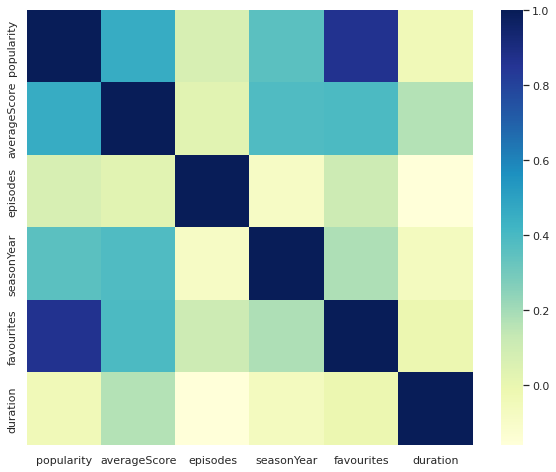

In [ ]:
sns.heatmap(df.corr(),cmap="YlGnBu")

It would appear that popularity and favourites are highly correlated with each other, along with popularity and average score.

**On average, how as popularity of the anime in the data changed over the years from 1991 to 2021?**

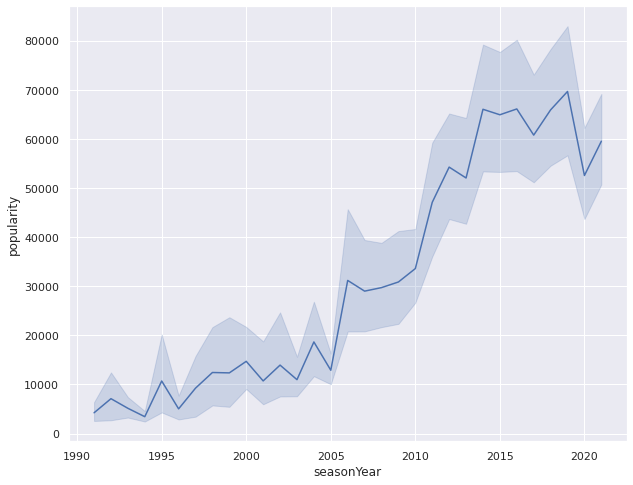

In [ ]:
sns.lineplot(data=df,x='seasonYear',y='popularity')

**How many of each media format are there?**

In [ ]:
df["format"].value_counts()

TV          1975
OVA          557
MOVIE        459
TV_SHORT     100
ONA           87
Name: format, dtype: int64

[Text(0.5, 1.0, 'Distribution of weighted average scores from 1991 to 2021')]

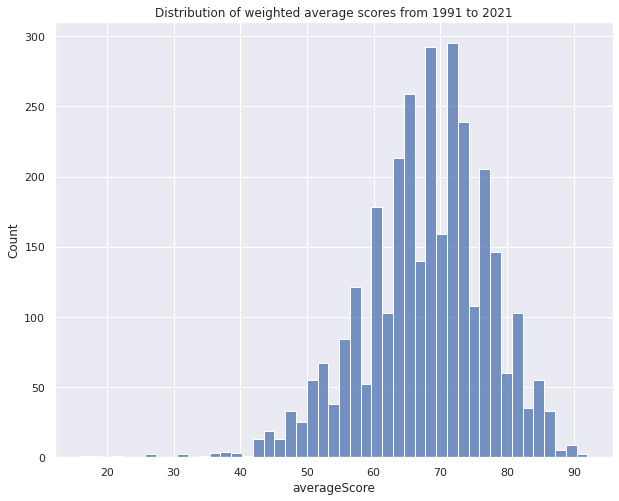

In [26]:
sns.histplot(data=df,x="averageScore").set(title="Distribution of weighted average scores from 1991 to 2021")

**Which studios were in charge of the most anime in the dataset?**

In [27]:
top_studios = df.studio.value_counts()[:6]
top_studios

J.C. Staff        192
MADHOUSE          182
Toei Animation    137
Sunrise           134
Production I.G    118
A-1 Pictures      109
Name: studio, dtype: int64

**Number of favorite anime by studio**

In [30]:
mean_favs = df[df.studio.isin(top_studios.index)].groupby('studio')['favourites'].mean().sort_values(ascending=False)

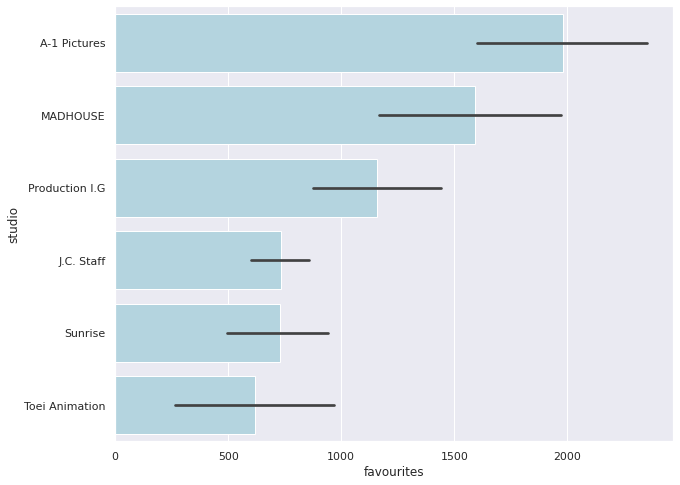

In [31]:
sns.barplot(data=df[df.studio.isin(top_studios.index)],
            x='favourites',
            y='studio',
            order = mean_favs.index,
            color="lightblue",
            ci=70,
            orient='h')

**Association between popularity and number of favorites**

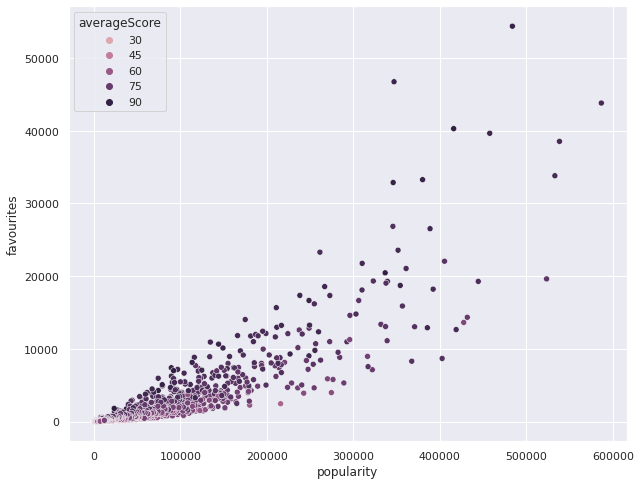

In [ ]:
sns.scatterplot(data=df,x='popularity',y='favourites',hue='averageScore')

The association looks rather exponential.

In [39]:
most_popular_anime = df.loc[df['popularity'].sort_values(ascending=False).index][['title','popularity']].iloc[:10]
highest_rated_anime = df.loc[df['averageScore'].sort_values(ascending=False).index][['title','averageScore']].iloc[:10]

[Text(0.5, 1.0, 'Most popular anime')]

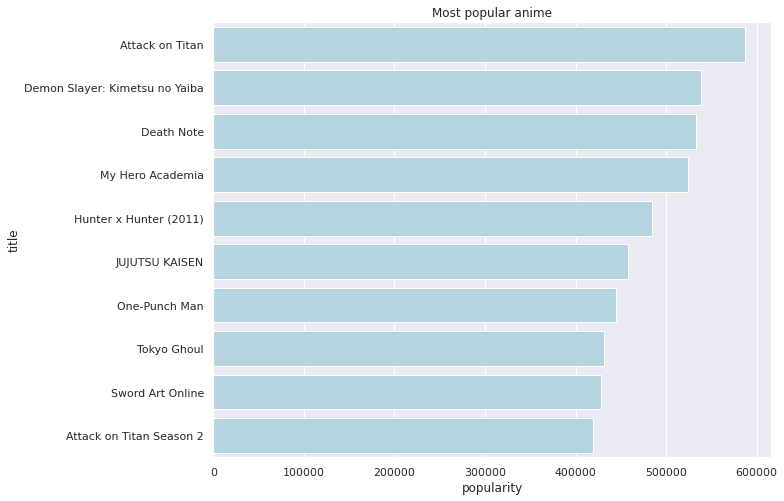

In [40]:
sns.barplot(data=most_popular_anime,
            x="popularity",
            y="title",
            orient="h",
            color="lightblue").set(title="Most popular anime")

[Text(0.5, 1.0, 'Most popular anime movies')]

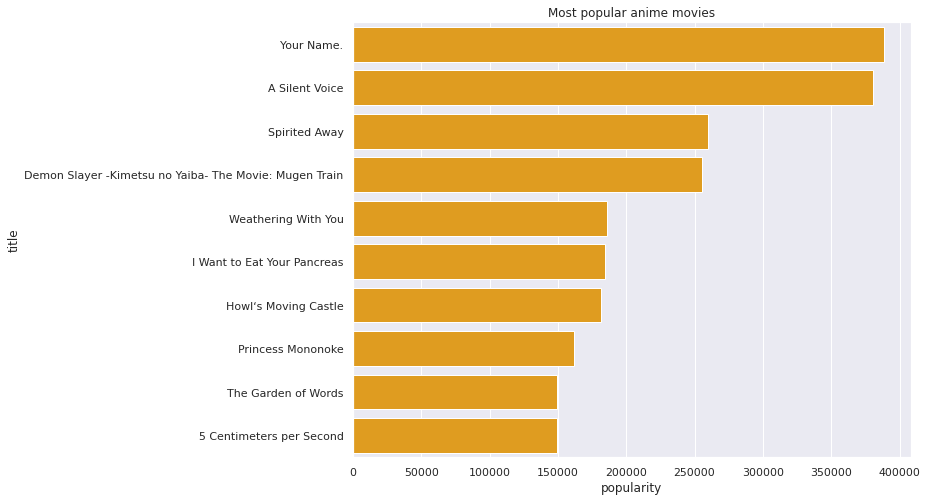

In [41]:
most_popular_movies = df.loc[df[df.format=="MOVIE"]['popularity'].sort_values(ascending=False).index][['title','popularity']].iloc[:10]
sns.barplot(data=most_popular_movies,
            x="popularity",
            y="title",
            orient="h",
            color="orange").set(title="Most popular anime movies")                                                                                                                           

In [ ]:
pd.Series(df.genres.sum()).value_counts()

Comedy           1549
Action           1293
Drama            1101
Romance           934
Fantasy           900
Adventure         835
Sci-Fi            789
Slice of Life     654
Supernatural      609
Ecchi             380
Mystery           359
Mecha             282
Psychological     266
Horror            173
Sports            170
Music             119
Thriller          108
Mahou Shoujo      107
                    1
dtype: int64

In [5]:
df[(df.popularity < 50000) & (df.averageScore > 80)].sort_values(by="averageScore",ascending=False)

,popularity,averageScore,genres,episodes,format,description,season,seasonYear,favourites,source,duration,siteUrl,title,studio,tags_cleaned,staff
id,,,,,,,,,,,,,,,,
114129,23460,92.0,"[Action, Comedy, Drama, Sci-Fi]",1.0,MOVIE,<i>Gintama: THE FINAL</i> is the 3rd and final...,WINTER,2021.0,1805,MANGA,104.0,https://anilist.co/anime/114129,Gintama: THE VERY FINAL,Bandai Namco Pictures,"[Samurai, Swordplay, Dissociative Identities, ...","[Hideaki Sorachi, Chizuru Miyawaki, Youichi Fu..."
101925,33370,87.0,"[Action, Comedy, Drama, Sci-Fi]",14.0,TV,The second season of the Silver Soul arc.,SUMMER,2018.0,768,MANGA,24.0,https://anilist.co/anime/101925,Gintama.: Silver Soul Arc - Second Half War,Bandai Namco Pictures,"[War, Time Skip, Tragedy, Space, Parody, Gore,...","[Hideaki Sorachi, Chizuru Miyawaki, Shinji Tak..."
21733,37646,87.0,[Drama],12.0,TV,"Unable to forget a performance of ""Shinigami"" ...",WINTER,2017.0,1762,MANGA,24.0,https://anilist.co/anime/21733,Descending Stories: Showa Genroku Rakugo Shinju,Studio DEEN,"[Rakugo, Josei, Primarily Adult Cast, Acting, ...","[Haruko Kumota, Shinichi Omata, Jun Kumagai, M..."
15335,34253,87.0,"[Action, Comedy, Sci-Fi]",1.0,MOVIE,When Gintoki apprehends a movie pirate at a pr...,SUMMER,2013.0,814,MANGA,110.0,https://anilist.co/anime/15335,Gintama: The Final Chapter - Be Forever Yorozuya,Sunrise,"[Time Manipulation, Tragedy, Male Protagonist,...","[Hideaki Sorachi, Youichi Fujita, Audio Highs,..."
100784,36619,86.0,"[Action, Comedy, Drama, Sci-Fi]",12.0,TV,Utsuro's ultimate plan is revealed: spark a un...,WINTER,2018.0,776,MANGA,24.0,https://anilist.co/anime/100784,Gintama.: Silver Soul Arc,Bandai Namco Pictures,"[Meta, Parody, Aliens, Male Protagonist, Samur...","[Hideaki Sorachi, Chizuru Miyawaki, BURNOUT SY..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20666,28422,81.0,"[Comedy, Sci-Fi]",13.0,TV,The second season of Space☆Dandy\n<br><br>\nSp...,SUMMER,2014.0,995,ORIGINAL,23.0,https://anilist.co/anime/20666,Space Dandy 2,bones,"[Space, Episodic, Aliens, Surreal Comedy, Parody]","[Shinichirou Watanabe, Shingo Natsume, Yoshiyu..."
235,44264,81.0,"[Adventure, Comedy, Mystery, Psychological]",inf,TV,Kudo Shinichi is a seventeen year-old high sch...,WINTER,1996.0,2937,MANGA,25.0,https://anilist.co/anime/235,Case Closed,TMS Entertainment,"[Detective, Espionage, Crime, Police, Conspira...","[Gosho Aoyama, Kenji Kodama, Yukihiro Shibutan..."
15227,40189,81.0,"[Drama, Slice of Life]",1.0,MOVIE,The story follows a young lady named Suzu Uran...,FALL,2016.0,944,MANGA,130.0,https://anilist.co/anime/15227,In This Corner of the World,MAPPA,"[Historical, War, Family Life, Female Protagon...","[Fumiyo Kouno, Sunao Katabuchi, Chie Uratani, ..."


## Clustering

We will use unsupervised learning to see if there are any hidden clusters/patterns among the anime we pulled. We first take into account the genres, tags, animation studio and key staff members. Then, we concatenate them to create a long string "soup" that contains the said text info.

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [6]:
df['staff'] = df['staff'].apply(lambda x: [s.replace(" ","") for s in x])
df['genres'] = df['genres'].apply(lambda x: [s.replace(" ","") for s in x])
df['tags_cleaned'] = df['tags_cleaned'].apply(lambda x: [s.replace(" ","") for s in x])

def create_soup(x):
  return  ' ' + ' '.join(x['genres']) + ' ' + ''.join(x['studio']).replace(" ","") + ' ' \
          + ' '.join(x['tags_cleaned']) + ' ' + ' '.join(x['staff'])

df['soup'] = df.apply(create_soup, axis=1)

In [17]:
df.soup.iloc[0]

' Drama Romance SliceofLife StudioGhibli FemaleProtagonist Iyashikei Rural Philosophy ComingofAge FamilyLife Biographical Seinen HotaruOkamoto YukoTone IsaoTakahata NorihikoSudo YoshifumiKondou'

For each string "soup," we turn them into a vector of word counts and combine them all into a dataframe. This is usually referred to as  "bag-of-words" model.

In [7]:
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df.soup)

In [11]:
cluster_df = pd.DataFrame(
    count_matrix.todense(),
    columns=count.get_feature_names_out()
)

We perform principal components analysis on this high dimensional dataframe to reduce the number of columns.

In [12]:
pca = PCA(n_components=3)
cluster_df_pca = pca.fit_transform(cluster_df)
cluster_df_pca = pd.DataFrame(cluster_df_pca)

We will be using the classic *k*-means clustering algorithm. We tune the number of clusters via the elbow method. For each number of clusters, the within-cluster-sum of squared errors is calculated (sum of the squares of the distance between each data value and its centroid), and we select the value of *k* for which the error starts to become negligble.

Text(0, 0.5, 'Error')

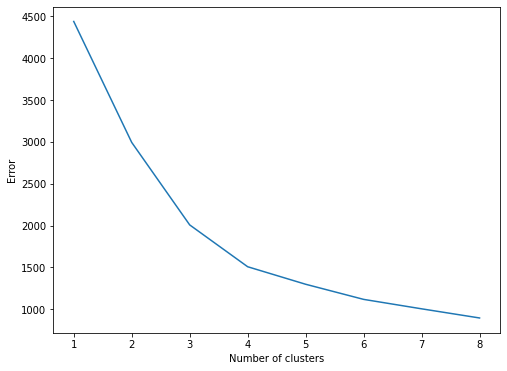

In [13]:
errors = []
for k in range(1,9):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(cluster_df_pca)
  errors.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(range(1,9),errors)
plt.xlabel("Number of clusters")
plt.ylabel("Error")

It looks like 4 is the optimal number of clusters.

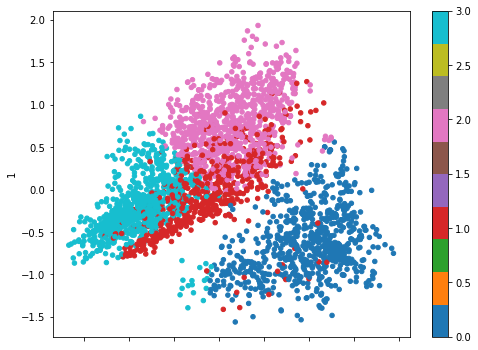

In [14]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(cluster_df_pca)

c_preds = kmeans.predict(cluster_df_pca)
pd.DataFrame(cluster_df_pca).plot.scatter(
    x=0,y=1,c=c_preds,colormap='tab10',figsize=(8,6)
  )

Text(0.5, 0, 'PC 3')

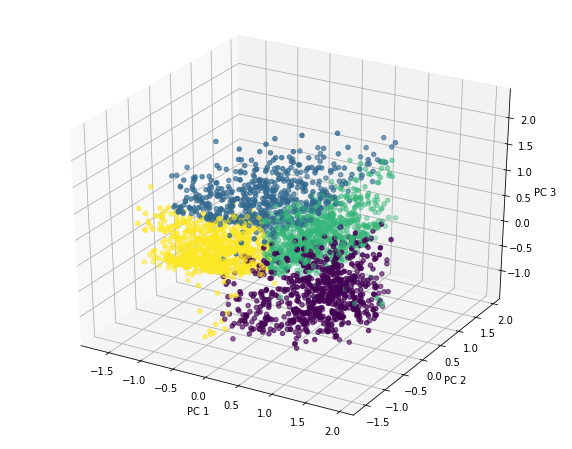

In [15]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(cluster_df_pca[0],cluster_df_pca[1],cluster_df_pca[2],c=c_preds)
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')

In [16]:
df['cluster'] = c_preds

c0 = df[df.cluster == 0]['soup']
c1 = df[df.cluster == 1][['title','soup']]
c2 = df[df.cluster == 2][['title','soup']]
c3 = df[df.cluster == 3][['title','soup']]

In [17]:
c0

,title,soup
id,,
898,Dragon Ball Z: Cooler's Revenge,Action Adventure Comedy Fantasy Sci-Fi ToeiAn...
897,Dragon Ball Z: Lord Slug,Action Adventure Comedy Fantasy Sci-Fi ToeiAn...
2000,Roujin Z,Action Comedy Drama Mecha Sci-Fi APPP Artific...
84,Mobile Suit Gundam 0083: Stardust Memory,Adventure Drama Mecha Sci-Fi Sunrise Space Mi...
785,Otaku no Video,Comedy Drama Mecha Sci-Fi Gainax OtakuCulture...
...,...,...
131930,Yasuke,Action Fantasy Mecha Sci-Fi MAPPA Samurai Swo...
106503,EX-ARM,Action Sci-Fi VisualFlight Tragedy SurrealCom...
123899,Sing a Bit of Harmony,Music Sci-Fi J.C.Staff Musical ArtificialInte...


This cluster seems to mainly contain action, sci-fi and mecha anime.

In [18]:
c1

,title,soup
id,,
1029,Only Yesterday,Drama Romance SliceofLife StudioGhibli Female...
795,Dear Brother,Drama Psychological TezukaProductions Tragedy...
2753,Who's Left Behind?,Drama SliceofLife MushiProduction Historical ...
1252,Nadia: The Secret of Blue Water - The Motion P...,Action Adventure Drama Mystery Romance Gainax...
2557,The Trapp Family Story,Drama Music Romance SliceofLife NipponAnimati...
...,...,...
130050,Summer Ghost,Drama Supernatural FLATSTUDIO Ghost Tragedy C...
117002,Magia Record: Puella Magi Madoka Magica Side S...,Drama MahouShoujo Mystery Psychological Thril...
131584,VISUAL PRISON,Music Supernatural A-1Pictures Vampire Idol P...


This cluster seems to mainly contain dramas.

In [19]:
c2

,title,soup
id,,
300,3x3 Eyes,Action Fantasy Horror Romance ToeiAnimation D...
1473,City Hunter '91,Action Comedy Mystery Sunrise Shounen Episodi...
1762,The Heroic Legend of Arslan: Age of Heroes,Action Adventure Drama Fantasy ProductionI.G ...
2229,Dragon Quest: Dai no Daibouken,Adventure Comedy Fantasy ToeiAnimation Demons...
418,"Ranma ½: Big Trouble in Nekonron, China",Adventure Comedy StudioDEEN MartialArts Gende...
...,...,...
128740,The Seven Deadly Sins: Cursed by Light,Action Adventure Comedy Ecchi Fantasy StudioD...
103277,Fate/Grand Order Divine Realm of the Round Tab...,Action Fantasy ProductionI.G Swordplay Traged...
116756,Fate/Grand Order Final Singularity - Grand Tem...,Action Fantasy Supernatural CloverWorks Magic...


This cluster mainly contains action, fantasy and adventure shows.

In [20]:
c3

,title,soup
id,,
2050,Honoo no Tenkousei,Action Comedy Sports Gainax Parody Boxing Sla...
1804,Here is Greenwood,Comedy Drama Romance SliceofLife Supernatural...
2525,Kekko Kamen,Comedy Ecchi StudioSignal GouNagai NobuhiroK...
727,Kingyo Chuuihou!,Comedy ToeiAnimation Kids Shoujo Slapstick Su...
966,Shin Chan,Comedy Ecchi SliceofLife Shin-EiAnimation Epi...
...,...,...
118103,The Vampire Dies in No Time,Comedy Supernatural MADHOUSE Episodic Vampire...
132096,Miss Kobayashi's Dragon Maid S Short Animation...,Comedy SliceofLife KyotoAnimation Episodic Cu...
114979,Love Live! Superstar!!,Music SliceofLife Sunrise Idol School Musical...


Our last cluster seems to primarily contain comedy and slice-of-life shows.

### Clustering without Studio and Staff members

Let's see if honing our focus on only genres and tags will make the clusters easier to make out.

In [8]:
def create_soup_2(x):
  return  ' ' + ' '.join(x['genres']) + ' ' + ' '.join(x['tags_cleaned'])

df['soup_2'] = df.apply(create_soup_2, axis=1)

In [16]:
df.soup_2.iloc[0]

' Drama Romance SliceofLife FemaleProtagonist Iyashikei Rural Philosophy ComingofAge FamilyLife Biographical Seinen'

In [9]:
count_2 = CountVectorizer(stop_words='english')
count_matrix_2 = count_2.fit_transform(df.soup_2)

cluster_df_2 = pd.DataFrame(
    count_matrix_2.todense(),
    columns=count_2.get_feature_names_out()
)

pca = PCA(n_components=3)
cluster_df_pca_2 = pca.fit_transform(cluster_df_2)

cluster_df_pca_2 = pd.DataFrame(cluster_df_pca_2)

Text(0, 0.5, 'Error')

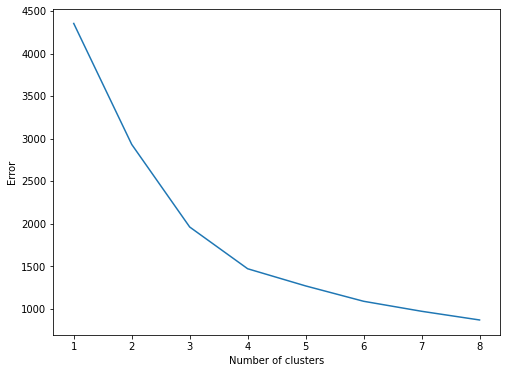

In [11]:
errors = []
for k in range(1,9):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(cluster_df_pca_2)
  errors.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(range(1,9),errors)
plt.xlabel("Number of clusters")
plt.ylabel("Error")

Text(0.5, 0, 'PC 3')

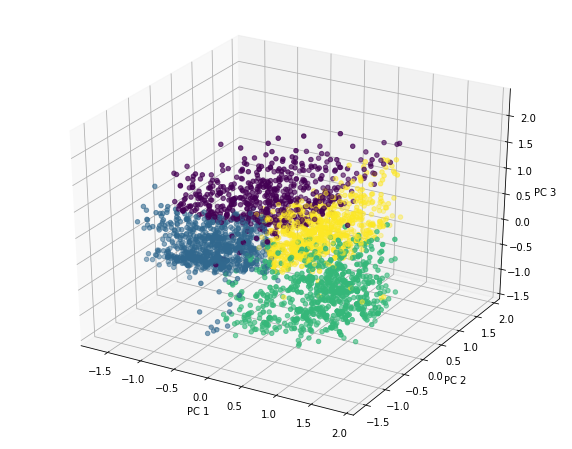

In [12]:
kmeans_2 = KMeans(n_clusters=4)
kmeans_2.fit(cluster_df_pca_2)

c_preds_2 = kmeans_2.predict(cluster_df_pca_2)
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(cluster_df_pca_2[0],cluster_df_pca_2[1],cluster_df_pca_2[2],c=c_preds_2)
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')

In [13]:
df['cluster_2'] = c_preds_2

c0 = df[df.cluster_2 == 0][['title','soup_2']]
c1 = df[df.cluster_2 == 1][['title','soup_2']]
c2 = df[df.cluster_2 == 2][['title','soup_2']]
c3 = df[df.cluster_2 == 3][['title','soup_2']]

In [14]:
c0

,title,soup_2
id,,
1029,Only Yesterday,Drama Romance SliceofLife FemaleProtagonist I...
795,Dear Brother,Drama Psychological Tragedy School Ojou-sama ...
2753,Who's Left Behind?,Drama SliceofLife Historical War
1252,Nadia: The Secret of Blue Water - The Motion P...,Action Adventure Drama Mystery Romance
2557,The Trapp Family Story,Drama Music Romance SliceofLife ClassicLitera...
...,...,...
130050,Summer Ghost,Drama Supernatural Ghost Tragedy ComingofAge ...
117002,Magia Record: Puella Magi Madoka Magica Side S...,Drama MahouShoujo Mystery Psychological Thril...
131584,VISUAL PRISON,Music Supernatural Vampire Idol PrimarilyMale...


This cluster mostly contains dramas.

In [15]:
c1

,title,soup_2
id,,
2050,Honoo no Tenkousei,Action Comedy Sports Parody Boxing Slapstick ...
1804,Here is Greenwood,Comedy Drama Romance SliceofLife Supernatural...
2525,Kekko Kamen,Comedy Ecchi
727,Kingyo Chuuihou!,Comedy Kids Shoujo Slapstick SurrealComedy Pr...
966,Shin Chan,Comedy Ecchi SliceofLife Episodic FamilyLife ...
...,...,...
118103,The Vampire Dies in No Time,Comedy Supernatural Episodic Vampire Slapstic...
132096,Miss Kobayashi's Dragon Maid S Short Animation...,Comedy SliceofLife Episodic CuteGirlsDoingCut...
114979,Love Live! Superstar!!,Music SliceofLife Idol School Musical Primari...


This cluster mainly contains comedy and slice-of-life series.

In [18]:
c2

,title,soup_2
id,,
898,Dragon Ball Z: Cooler's Revenge,Action Adventure Comedy Fantasy Sci-Fi Martia...
897,Dragon Ball Z: Lord Slug,Action Adventure Comedy Fantasy Sci-Fi Shoune...
2000,Roujin Z,Action Comedy Drama Mecha Sci-Fi ArtificialIn...
84,Mobile Suit Gundam 0083: Stardust Memory,Adventure Drama Mecha Sci-Fi Space Military H...
785,Otaku no Video,Comedy Drama Mecha Sci-Fi OtakuCulture Meta P...
...,...,...
131930,Yasuke,Action Fantasy Mecha Sci-Fi Samurai Swordplay...
106503,EX-ARM,Action Sci-Fi Tragedy SurrealComedy CGI Terro...
123899,Sing a Bit of Harmony,Music Sci-Fi Musical ArtificialIntelligence R...


This cluster contains action, mecha and sci-fi shows.

In [19]:
c3

,title,soup_2
id,,
300,3x3 Eyes,Action Fantasy Horror Romance Demons Magic
1473,City Hunter '91,Action Comedy Mystery Shounen Episodic Police...
1762,The Heroic Legend of Arslan: Age of Heroes,Action Adventure Drama Fantasy War MaleProtag...
2229,Dragon Quest: Dai no Daibouken,Adventure Comedy Fantasy Demons Magic MalePro...
418,"Ranma ½: Big Trouble in Nekonron, China",Adventure Comedy MartialArts GenderBending Fo...
...,...,...
128740,The Seven Deadly Sins: Cursed by Light,Action Adventure Comedy Ecchi Fantasy Demons ...
103277,Fate/Grand Order Divine Realm of the Round Tab...,Action Fantasy Swordplay Tragedy Gods MalePro...
116756,Fate/Grand Order Final Singularity - Grand Tem...,Action Fantasy Supernatural Magic Crossover T...


This cluster contains action, adventure and fantasy anime.

It seems that removing studio and staff members did not make a big difference on the type of anime each cluster contains.